In [32]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import graphviz

from sklearn import preprocessing,model_selection
import itertools

import xgboost as xgb

In [7]:
train_df = pd.read_csv('cs-training.csv')
test_df = pd.read_csv('cs-test.csv')
print ("training dataset shape is {}".format(train_df.shape))
print ("testing dataset shape is {}".format(test_df.shape))

training dataset shape is (150000, 12)
testing dataset shape is (101503, 12)


In [8]:
train_df.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [9]:
col_names = train_df.columns.values
col_names[0] = 'ID' ## rename first column to ID
train_df.columns = col_names ## assign new column name to training dataset
test_df.columns = col_names ## assign new column name to testing dataset

In [10]:
train_df.head()

,ID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [11]:
test_df.head()

,ID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


Check column type

In [12]:
print(train_df.dtypes)

ID                                        int64
SeriousDlqin2yrs                          int64
RevolvingUtilizationOfUnsecuredLines    float64
age                                       int64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfOpenCreditLinesAndLoans           int64
NumberOfTimes90DaysLate                   int64
NumberRealEstateLoansOrLines              int64
NumberOfTime60-89DaysPastDueNotWorse      int64
NumberOfDependents                      float64
dtype: object


In [13]:
print(test_df.dtypes)

ID                                        int64
SeriousDlqin2yrs                        float64
RevolvingUtilizationOfUnsecuredLines    float64
age                                       int64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfOpenCreditLinesAndLoans           int64
NumberOfTimes90DaysLate                   int64
NumberRealEstateLoansOrLines              int64
NumberOfTime60-89DaysPastDueNotWorse      int64
NumberOfDependents                      float64
dtype: object


In [14]:
train_df.isnull().sum()

ID                                          0
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [15]:
test_df.isnull().sum()

ID                                           0
SeriousDlqin2yrs                        101503
RevolvingUtilizationOfUnsecuredLines         0
age                                          0
NumberOfTime30-59DaysPastDueNotWorse         0
DebtRatio                                    0
MonthlyIncome                            20103
NumberOfOpenCreditLinesAndLoans              0
NumberOfTimes90DaysLate                      0
NumberRealEstateLoansOrLines                 0
NumberOfTime60-89DaysPastDueNotWorse         0
NumberOfDependents                        2626
dtype: int64

Check distribution of each features to see outlier

"MonthlyIncome" and "NumberOfDependents" are removed here as they have nan values

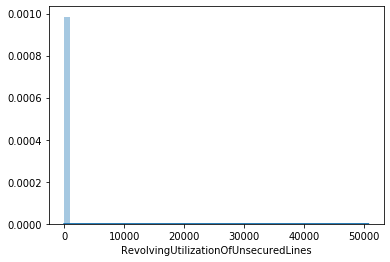

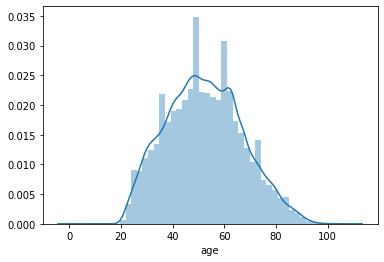

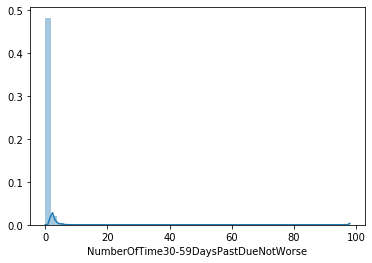

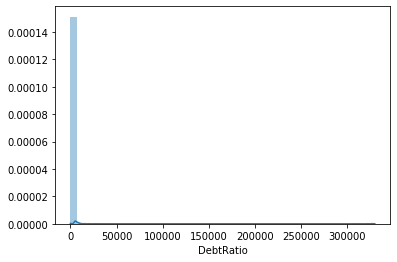

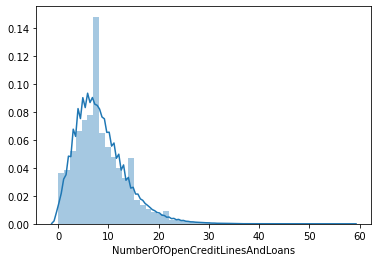

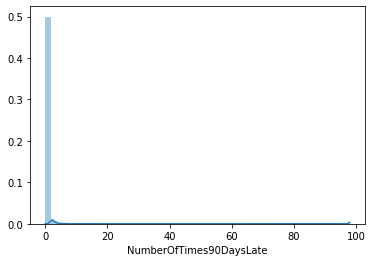

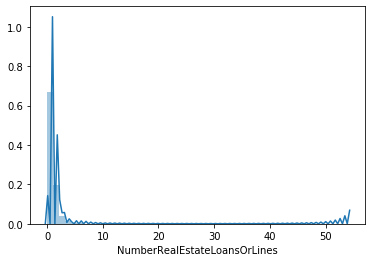

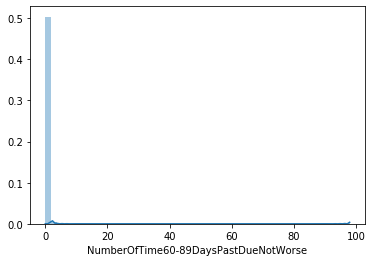

In [18]:
# remove ID, target variable Dlqin2yrs and variables with missing values
feature_list=list(train_df.columns.values)
remove_list = ['ID','SeriousDlqin2yrs','MonthlyIncome','NumberOfDependents']
for each in remove_list:
    feature_list.remove(each)

for each in feature_list:
    sns.distplot(train_df[each])
    plt.show()

Distribution of following features are highly skewed.

* RevolvingUtilizationOfUnsecuredLines
* NumberOfTime30-59DaysPastDueNotWorse
* DebtRatio
* NumberOfTimes30DaysLate
* NumberRealEstateLoansOrLines
* NumberOfTime60-89DaysPastDueNotWorse

Take a log transformation to see if distribution can be less skewed.

In [19]:
print (train_df.columns.values)

['ID' 'SeriousDlqin2yrs' 'RevolvingUtilizationOfUnsecuredLines' 'age'
 'NumberOfTime30-59DaysPastDueNotWorse' 'DebtRatio' 'MonthlyIncome'
 'NumberOfOpenCreditLinesAndLoans' 'NumberOfTimes90DaysLate'
 'NumberRealEstateLoansOrLines' 'NumberOfTime60-89DaysPastDueNotWorse'
 'NumberOfDependents']


In [20]:
log_trans_list = train_df.columns.values[[2,4,5,8,9,10]]
log_trans_list
for each in log_trans_list:
    train_df[each] = np.log(1+train_df[each].values)

Distribution after log transformation

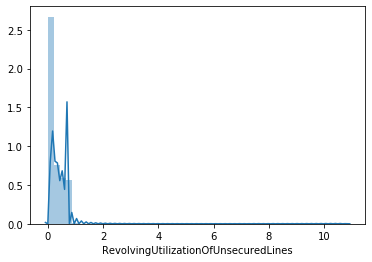

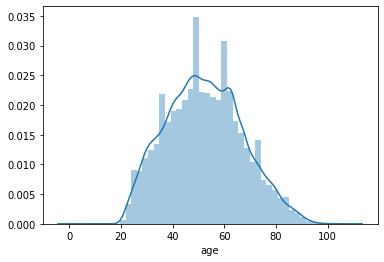

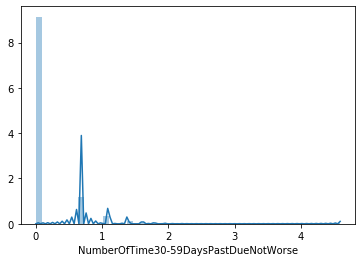

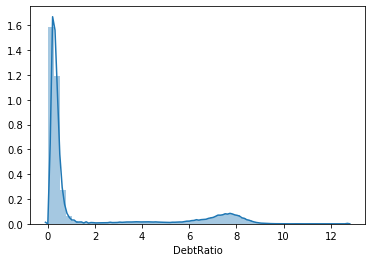

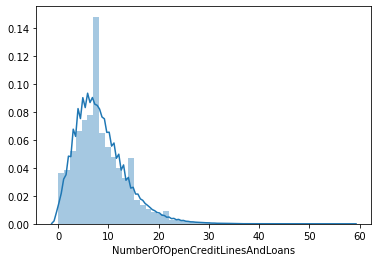

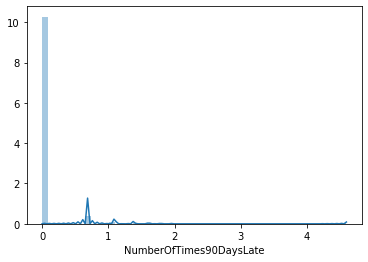

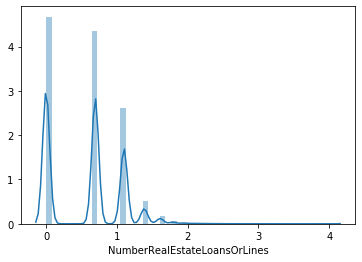

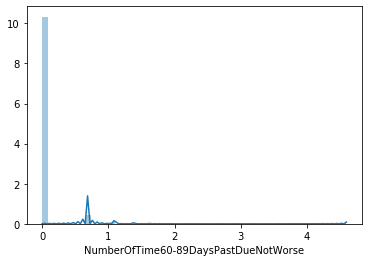

In [21]:
for each in feature_list:
    sns.distplot(train_df[each])
    plt.show()

The distribution after transformation is much less skewed. We may able to put them into machine learning algorithm later.

Remove nan values in "MonthlyIncome" and "NumberOfDependents" to check their distribution

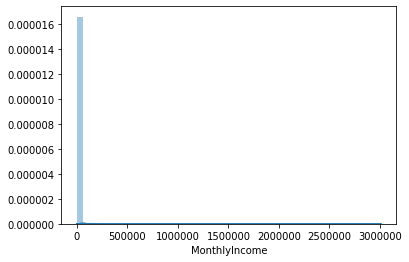

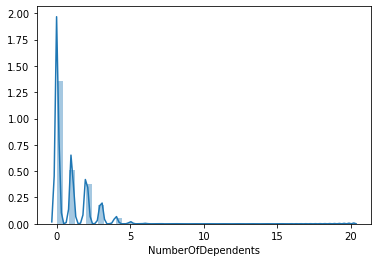

In [22]:
partial_train_df = train_df[['MonthlyIncome','NumberOfDependents']]
#partial_train_df.dropna(how='any')
partial_train_df = partial_train_df.dropna(how='any')

sns.distplot(partial_train_df['MonthlyIncome'])
plt.show()
sns.distplot(partial_train_df['NumberOfDependents'])
plt.show()

monthlyIncome is highly skewed. let us take log transformation on both then check their distribution again

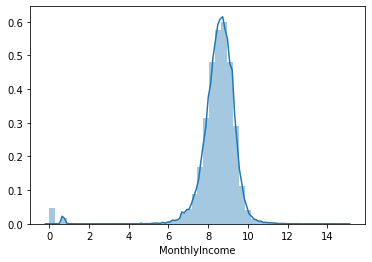

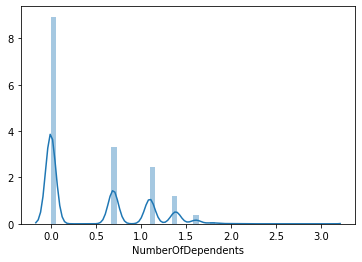

In [23]:
partial_train_df['MonthlyIncome'] = np.log(1+partial_train_df['MonthlyIncome'].values)
partial_train_df['NumberOfDependents'] = np.log(1+partial_train_df['NumberOfDependents'].values)


sns.distplot(partial_train_df['MonthlyIncome'])
plt.show()
sns.distplot(partial_train_df['NumberOfDependents'])
plt.show()

Post transformation looks better than before. I will keep log transformation on both at this time.

In [24]:
train_df['MonthlyIncome'] = np.log(1+train_df['MonthlyIncome'].values)
train_df['NumberOfDependents'] = np.log(1+train_df['NumberOfDependents'].values)

    age      mean  count
0     0  0.000000      1
1    21  0.071038    183
2    22  0.082949    434
3    23  0.109204    641
4    24  0.120098    816
..  ...       ...    ...
81  102  0.000000      3
82  103  0.000000      3
83  105  0.000000      1
84  107  0.000000      1
85  109  0.000000      2

[86 rows x 3 columns]


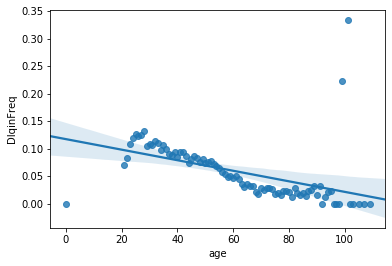

In [26]:
grouped_df = train_df.groupby('age')
dlinq_age = grouped_df['SeriousDlqin2yrs'].aggregate([np.mean,'count']).reset_index()
print(dlinq_age)
dlinq_age.columns =['age','DlqinFreq','count']
sns.regplot(x='age',y='DlqinFreq',data=dlinq_age)
plt.show()

From the plot above, we can see:

* DlinFreq is negatively associated with age in general
* age of 0,99 and 101 looks like outliers
* DlinFreq looks like a quardratic function of age. Put a higher order of age maybe helpful

Remove outlier in age and create new feature $age^2$

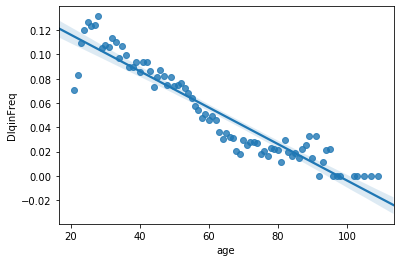

In [27]:
## remove outlier
train_df = train_df[train_df['age'] != 0]
train_df = train_df[train_df['age'] !=99]
train_df = train_df[train_df['age'] !=101]
grouped_df = train_df.groupby('age')
dlinq_age = grouped_df['SeriousDlqin2yrs'].aggregate([np.mean,'count']).reset_index()
dlinq_age.columns =['age','DlqinFreq','count']
sns.regplot(x='age',y='DlqinFreq',data=dlinq_age)
plt.show()

## create new features
train_df['age_sqr'] = train_df['age'].values^2 
## apply the same operation on testing set
test_df['age_sqr'] = test_df['age'].values^2

Split the data

In [29]:
train_y = train_df['SeriousDlqin2yrs']
#'RevolvingUtilizationOfUnsecuredLines'
train_X = train_df.drop(['SeriousDlqin2yrs','ID'],axis=1,inplace=False)
test_X = test_df.drop(['SeriousDlqin2yrs','ID'],axis=1,inplace=False)
print(type(train_y))

skf = model_selection.StratifiedKFold(n_splits=5,random_state=100)
xgb_params = {
'eta':0.03,
'max_depth':4,
'sub_sample':0.9,
'colsample_bytree':0.5,
'objective':'binary:logistic',
'eval_metric':'auc',
'silent':0
}

print(train_X.shape)
print(train_X.columns)
print(test_X.shape)

<class 'pandas.core.series.Series'>
(149987, 11)
Index(['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents', 'age_sqr'],
      dtype='object')
(101503, 11)


[23:55:16] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.0.0\src\learner.cc:328: 
Parameters: { silent, sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-auc:0.78764	val-auc:0.78068
Multiple eval metrics have been passed: 'val-auc' will be used for early stopping.

Will train until val-auc hasn't improved in 30 rounds.
[1]	train-auc:0.83959	val-auc:0.82927
[2]	train-auc:0.85165	val-auc:0.84525
[3]	train-auc:0.84748	val-auc:0.84113
[4]	train-auc:0.84697	val-auc:0.84074
[5]	train-auc:0.85837	val-auc:0.85253
[6]	train-auc:0.86027	val-auc:0.85563
[7]	train-auc:0.85885	val-auc:0.85507
[8]	train-auc:0.85877	val-auc:0.85479
[9]	train-auc:0.85875	val-auc:0.85494
[10]	train-auc:0.85996	val-auc:0.85565
[11]	train-auc:0.86038	val-auc:0.85657
[12]	tr

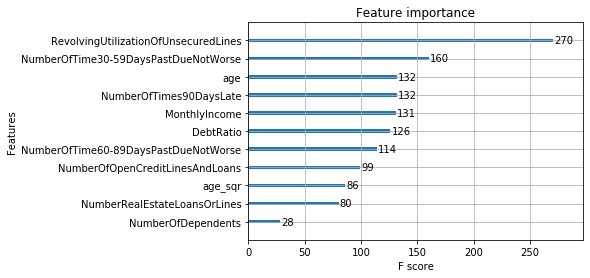

[23:55:24] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.0.0\src\learner.cc:328: 
Parameters: { silent, sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-auc:0.78678	val-auc:0.78134
Multiple eval metrics have been passed: 'val-auc' will be used for early stopping.

Will train until val-auc hasn't improved in 30 rounds.
[1]	train-auc:0.83940	val-auc:0.83332
[2]	train-auc:0.85235	val-auc:0.84693
[3]	train-auc:0.84786	val-auc:0.84332
[4]	train-auc:0.84712	val-auc:0.84247
[5]	train-auc:0.85818	val-auc:0.85405
[6]	train-auc:0.86079	val-auc:0.85594
[7]	train-auc:0.85953	val-auc:0.85515
[8]	train-auc:0.85936	val-auc:0.85513
[9]	train-auc:0.85935	val-auc:0.85531
[10]	train-auc:0.86040	val-auc:0.85621
[11]	train-auc:0.86090	val-auc:0.85646
[12]	tr

[195]	train-auc:0.87050	val-auc:0.86113
[196]	train-auc:0.87052	val-auc:0.86113
[197]	train-auc:0.87057	val-auc:0.86112
[198]	train-auc:0.87064	val-auc:0.86116
[199]	train-auc:0.87066	val-auc:0.86115
[200]	train-auc:0.87069	val-auc:0.86116
[201]	train-auc:0.87074	val-auc:0.86117
[202]	train-auc:0.87081	val-auc:0.86118
[203]	train-auc:0.87090	val-auc:0.86121
[204]	train-auc:0.87099	val-auc:0.86123
[205]	train-auc:0.87109	val-auc:0.86129
[206]	train-auc:0.87114	val-auc:0.86131
[207]	train-auc:0.87121	val-auc:0.86132
[208]	train-auc:0.87125	val-auc:0.86132
[209]	train-auc:0.87126	val-auc:0.86133
[210]	train-auc:0.87133	val-auc:0.86139
[211]	train-auc:0.87139	val-auc:0.86140
[212]	train-auc:0.87144	val-auc:0.86145
[213]	train-auc:0.87148	val-auc:0.86148
[214]	train-auc:0.87150	val-auc:0.86148
[215]	train-auc:0.87156	val-auc:0.86148
[216]	train-auc:0.87161	val-auc:0.86149
[217]	train-auc:0.87164	val-auc:0.86149
[218]	train-auc:0.87167	val-auc:0.86150
[219]	train-auc:0.87170	val-auc:0.86149


[400]	train-auc:0.87648	val-auc:0.86232
[401]	train-auc:0.87650	val-auc:0.86232
[402]	train-auc:0.87651	val-auc:0.86233
[403]	train-auc:0.87654	val-auc:0.86232
[404]	train-auc:0.87657	val-auc:0.86234
[405]	train-auc:0.87660	val-auc:0.86235
[406]	train-auc:0.87660	val-auc:0.86235
[407]	train-auc:0.87664	val-auc:0.86236
[408]	train-auc:0.87665	val-auc:0.86236
[409]	train-auc:0.87668	val-auc:0.86238
[410]	train-auc:0.87670	val-auc:0.86239
[411]	train-auc:0.87673	val-auc:0.86238
[412]	train-auc:0.87674	val-auc:0.86237
[413]	train-auc:0.87674	val-auc:0.86237
[414]	train-auc:0.87677	val-auc:0.86237
[415]	train-auc:0.87678	val-auc:0.86238
[416]	train-auc:0.87680	val-auc:0.86238
[417]	train-auc:0.87685	val-auc:0.86237
[418]	train-auc:0.87686	val-auc:0.86236
[419]	train-auc:0.87687	val-auc:0.86235
[420]	train-auc:0.87691	val-auc:0.86237
[421]	train-auc:0.87693	val-auc:0.86238
[422]	train-auc:0.87694	val-auc:0.86240
[423]	train-auc:0.87699	val-auc:0.86241
[424]	train-auc:0.87701	val-auc:0.86241


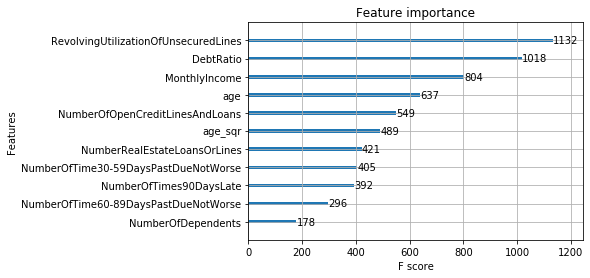

[23:56:14] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.0.0\src\learner.cc:328: 
Parameters: { silent, sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-auc:0.78775	val-auc:0.78201
Multiple eval metrics have been passed: 'val-auc' will be used for early stopping.

Will train until val-auc hasn't improved in 30 rounds.
[1]	train-auc:0.83850	val-auc:0.83896
[2]	train-auc:0.85288	val-auc:0.85120
[3]	train-auc:0.84975	val-auc:0.84736
[4]	train-auc:0.84928	val-auc:0.84615
[5]	train-auc:0.85833	val-auc:0.85560
[6]	train-auc:0.85965	val-auc:0.85696
[7]	train-auc:0.85920	val-auc:0.85590
[8]	train-auc:0.85904	val-auc:0.85597
[9]	train-auc:0.85881	val-auc:0.85540
[10]	train-auc:0.85956	val-auc:0.85642
[11]	train-auc:0.86012	val-auc:0.85652
[12]	tr

[195]	train-auc:0.86958	val-auc:0.86357
[196]	train-auc:0.86960	val-auc:0.86357
[197]	train-auc:0.86963	val-auc:0.86358
[198]	train-auc:0.86969	val-auc:0.86359
[199]	train-auc:0.86970	val-auc:0.86362
[200]	train-auc:0.86973	val-auc:0.86363
[201]	train-auc:0.86977	val-auc:0.86362
[202]	train-auc:0.86981	val-auc:0.86364
[203]	train-auc:0.86990	val-auc:0.86369
[204]	train-auc:0.86999	val-auc:0.86373
[205]	train-auc:0.87004	val-auc:0.86371
[206]	train-auc:0.87011	val-auc:0.86373
[207]	train-auc:0.87014	val-auc:0.86376
[208]	train-auc:0.87019	val-auc:0.86377
[209]	train-auc:0.87019	val-auc:0.86378
[210]	train-auc:0.87026	val-auc:0.86380
[211]	train-auc:0.87033	val-auc:0.86381
[212]	train-auc:0.87039	val-auc:0.86381
[213]	train-auc:0.87043	val-auc:0.86384
[214]	train-auc:0.87047	val-auc:0.86387
[215]	train-auc:0.87055	val-auc:0.86389
[216]	train-auc:0.87059	val-auc:0.86391
[217]	train-auc:0.87063	val-auc:0.86396
[218]	train-auc:0.87066	val-auc:0.86398
[219]	train-auc:0.87071	val-auc:0.86401


[400]	train-auc:0.87613	val-auc:0.86551
[401]	train-auc:0.87616	val-auc:0.86552
[402]	train-auc:0.87617	val-auc:0.86552
[403]	train-auc:0.87619	val-auc:0.86554
[404]	train-auc:0.87624	val-auc:0.86552
[405]	train-auc:0.87627	val-auc:0.86552
[406]	train-auc:0.87630	val-auc:0.86552
[407]	train-auc:0.87631	val-auc:0.86552
[408]	train-auc:0.87632	val-auc:0.86551
[409]	train-auc:0.87635	val-auc:0.86551
[410]	train-auc:0.87636	val-auc:0.86551
[411]	train-auc:0.87637	val-auc:0.86551
[412]	train-auc:0.87638	val-auc:0.86551
[413]	train-auc:0.87640	val-auc:0.86551
[414]	train-auc:0.87643	val-auc:0.86550
[415]	train-auc:0.87644	val-auc:0.86550
[416]	train-auc:0.87648	val-auc:0.86549
[417]	train-auc:0.87648	val-auc:0.86549
[418]	train-auc:0.87652	val-auc:0.86550
[419]	train-auc:0.87652	val-auc:0.86550
[420]	train-auc:0.87654	val-auc:0.86550
[421]	train-auc:0.87655	val-auc:0.86549
[422]	train-auc:0.87656	val-auc:0.86549
[423]	train-auc:0.87658	val-auc:0.86548
[424]	train-auc:0.87661	val-auc:0.86548


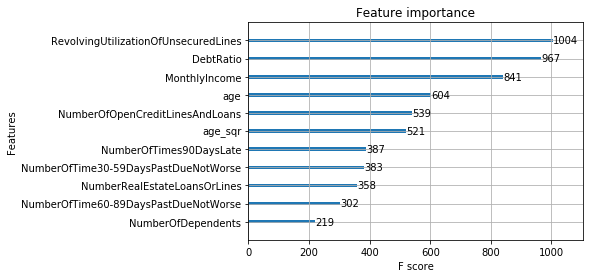

[23:56:57] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.0.0\src\learner.cc:328: 
Parameters: { silent, sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-auc:0.78712	val-auc:0.78299
Multiple eval metrics have been passed: 'val-auc' will be used for early stopping.

Will train until val-auc hasn't improved in 30 rounds.
[1]	train-auc:0.83852	val-auc:0.83623
[2]	train-auc:0.85193	val-auc:0.84571
[3]	train-auc:0.84707	val-auc:0.84144
[4]	train-auc:0.84664	val-auc:0.84039
[5]	train-auc:0.85759	val-auc:0.85329
[6]	train-auc:0.85978	val-auc:0.85636
[7]	train-auc:0.85871	val-auc:0.85451
[8]	train-auc:0.85863	val-auc:0.85416
[9]	train-auc:0.85863	val-auc:0.85420
[10]	train-auc:0.85973	val-auc:0.85540
[11]	train-auc:0.86015	val-auc:0.85485
[12]	tr

[195]	train-auc:0.86962	val-auc:0.86345
[196]	train-auc:0.86966	val-auc:0.86344
[197]	train-auc:0.86973	val-auc:0.86347
[198]	train-auc:0.86979	val-auc:0.86352
[199]	train-auc:0.86980	val-auc:0.86354
[200]	train-auc:0.86987	val-auc:0.86361
[201]	train-auc:0.86991	val-auc:0.86364
[202]	train-auc:0.86994	val-auc:0.86370
[203]	train-auc:0.87004	val-auc:0.86376
[204]	train-auc:0.87012	val-auc:0.86377
[205]	train-auc:0.87020	val-auc:0.86382
[206]	train-auc:0.87026	val-auc:0.86383
[207]	train-auc:0.87030	val-auc:0.86384
[208]	train-auc:0.87034	val-auc:0.86389
[209]	train-auc:0.87035	val-auc:0.86388
[210]	train-auc:0.87042	val-auc:0.86390
[211]	train-auc:0.87049	val-auc:0.86395
[212]	train-auc:0.87053	val-auc:0.86393
[213]	train-auc:0.87056	val-auc:0.86398
[214]	train-auc:0.87060	val-auc:0.86400
[215]	train-auc:0.87066	val-auc:0.86403
[216]	train-auc:0.87071	val-auc:0.86407
[217]	train-auc:0.87075	val-auc:0.86411
[218]	train-auc:0.87079	val-auc:0.86414
[219]	train-auc:0.87082	val-auc:0.86415


[400]	train-auc:0.87589	val-auc:0.86568
[401]	train-auc:0.87589	val-auc:0.86568
[402]	train-auc:0.87591	val-auc:0.86569
[403]	train-auc:0.87592	val-auc:0.86569
[404]	train-auc:0.87593	val-auc:0.86568
[405]	train-auc:0.87597	val-auc:0.86567
[406]	train-auc:0.87597	val-auc:0.86567
[407]	train-auc:0.87601	val-auc:0.86567
[408]	train-auc:0.87602	val-auc:0.86567
[409]	train-auc:0.87603	val-auc:0.86567
[410]	train-auc:0.87604	val-auc:0.86567
[411]	train-auc:0.87606	val-auc:0.86568
[412]	train-auc:0.87607	val-auc:0.86568
[413]	train-auc:0.87610	val-auc:0.86566
[414]	train-auc:0.87614	val-auc:0.86566
[415]	train-auc:0.87615	val-auc:0.86564
[416]	train-auc:0.87617	val-auc:0.86566
[417]	train-auc:0.87618	val-auc:0.86566
[418]	train-auc:0.87621	val-auc:0.86566
[419]	train-auc:0.87621	val-auc:0.86566
[420]	train-auc:0.87623	val-auc:0.86566
[421]	train-auc:0.87623	val-auc:0.86565
[422]	train-auc:0.87624	val-auc:0.86566
[423]	train-auc:0.87625	val-auc:0.86566
[424]	train-auc:0.87629	val-auc:0.86567


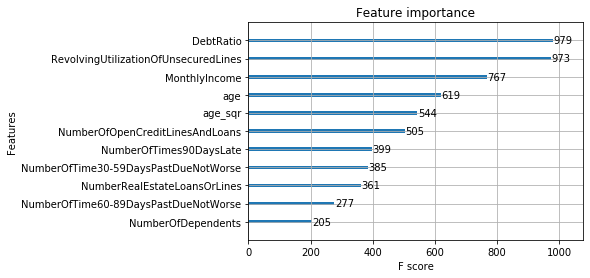

[23:57:46] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.0.0\src\learner.cc:328: 
Parameters: { silent, sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-auc:0.78347	val-auc:0.79575
Multiple eval metrics have been passed: 'val-auc' will be used for early stopping.

Will train until val-auc hasn't improved in 30 rounds.
[1]	train-auc:0.83712	val-auc:0.84332
[2]	train-auc:0.85065	val-auc:0.85959
[3]	train-auc:0.84673	val-auc:0.85507
[4]	train-auc:0.84610	val-auc:0.85563
[5]	train-auc:0.85666	val-auc:0.86227
[6]	train-auc:0.85831	val-auc:0.86301
[7]	train-auc:0.85742	val-auc:0.86225
[8]	train-auc:0.85723	val-auc:0.86263
[9]	train-auc:0.85701	val-auc:0.86273
[10]	train-auc:0.85815	val-auc:0.86335
[11]	train-auc:0.85869	val-auc:0.86425
[12]	tr

[195]	train-auc:0.86818	val-auc:0.87019
[196]	train-auc:0.86822	val-auc:0.87023
[197]	train-auc:0.86826	val-auc:0.87026
[198]	train-auc:0.86831	val-auc:0.87028
[199]	train-auc:0.86835	val-auc:0.87025
[200]	train-auc:0.86836	val-auc:0.87026
[201]	train-auc:0.86840	val-auc:0.87029
[202]	train-auc:0.86844	val-auc:0.87028
[203]	train-auc:0.86851	val-auc:0.87031
[204]	train-auc:0.86862	val-auc:0.87035
[205]	train-auc:0.86868	val-auc:0.87036
[206]	train-auc:0.86872	val-auc:0.87040
[207]	train-auc:0.86876	val-auc:0.87040
[208]	train-auc:0.86881	val-auc:0.87041
[209]	train-auc:0.86882	val-auc:0.87042
[210]	train-auc:0.86889	val-auc:0.87046
[211]	train-auc:0.86897	val-auc:0.87048
[212]	train-auc:0.86900	val-auc:0.87052
[213]	train-auc:0.86903	val-auc:0.87052
[214]	train-auc:0.86906	val-auc:0.87053
[215]	train-auc:0.86914	val-auc:0.87055
[216]	train-auc:0.86918	val-auc:0.87055
[217]	train-auc:0.86921	val-auc:0.87056
[218]	train-auc:0.86924	val-auc:0.87058
[219]	train-auc:0.86927	val-auc:0.87058


[400]	train-auc:0.87440	val-auc:0.87161
[401]	train-auc:0.87443	val-auc:0.87161
[402]	train-auc:0.87444	val-auc:0.87161
[403]	train-auc:0.87447	val-auc:0.87162
[404]	train-auc:0.87447	val-auc:0.87162
[405]	train-auc:0.87449	val-auc:0.87162
[406]	train-auc:0.87450	val-auc:0.87163
[407]	train-auc:0.87453	val-auc:0.87164
[408]	train-auc:0.87457	val-auc:0.87164
[409]	train-auc:0.87459	val-auc:0.87164
[410]	train-auc:0.87460	val-auc:0.87164
[411]	train-auc:0.87462	val-auc:0.87162
[412]	train-auc:0.87464	val-auc:0.87162
[413]	train-auc:0.87465	val-auc:0.87162
[414]	train-auc:0.87467	val-auc:0.87162
[415]	train-auc:0.87470	val-auc:0.87163
[416]	train-auc:0.87471	val-auc:0.87163
[417]	train-auc:0.87472	val-auc:0.87163
[418]	train-auc:0.87475	val-auc:0.87164
[419]	train-auc:0.87476	val-auc:0.87164
[420]	train-auc:0.87479	val-auc:0.87164
[421]	train-auc:0.87481	val-auc:0.87165
[422]	train-auc:0.87482	val-auc:0.87165
[423]	train-auc:0.87482	val-auc:0.87164
[424]	train-auc:0.87484	val-auc:0.87165


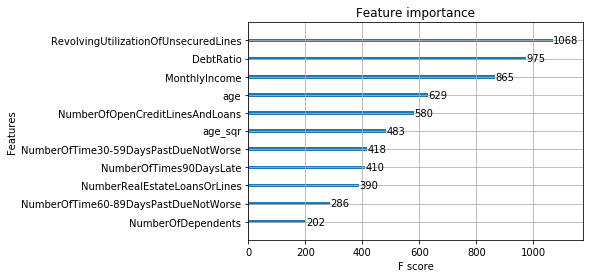

In [30]:
best_iteration =[]
best_score= []
training_score = []
for train_ind,val_ind in skf.split(train_X,train_y):
    #print (set(train_y))
    #print (type(train_y))
    X_train,X_val = train_X.iloc[train_ind,],train_X.iloc[val_ind,]
    y_train,y_val = train_y.iloc[train_ind],train_y.iloc[val_ind]
    #print (set(train_y))
    #print (max(train_ind),min(train_ind),max(val_ind),min(val_ind))
    #print (train_ind,val_ind)
    #print(set(y_train))
    dtrain = xgb.DMatrix(X_train,y_train,feature_names = X_train.columns)
    dval = xgb.DMatrix(X_val,y_val,feature_names = X_val.columns)
    model = xgb.train(xgb_params,dtrain,num_boost_round=1000,
                      evals=[(dtrain,'train'),(dval,'val')],verbose_eval=True,early_stopping_rounds=30)
    best_iteration.append(model.attributes()['best_iteration'])
    best_score.append(model.attributes()['best_score'])
    # training_score.append(model.attributes()['best_msg'].split()[1][-8:])
    xgb.plot_importance(model)
    plt.show()

In [33]:
def xgbCV(eta=[0.05],max_depth=[6],sub_sample=[0.9],colsample_bytree=[0.9]):
    train_y = train_df['SeriousDlqin2yrs'] # label for training data
    train_X = train_df.drop(['SeriousDlqin2yrs','ID'],axis=1,inplace=False) # feature for training data
    test_X = test_df.drop(['SeriousDlqin2yrs','ID'],axis=1,inplace=False) # feature for testing data
    skf = model_selection.StratifiedKFold(n_splits=5,random_state=100) # stratified sampling
    train_performance ={} 
    val_performance={}
    for each_param in itertools.product(eta,max_depth,sub_sample,colsample_bytree): # iterative over each combination in parameter space
        xgb_params = {
                    'eta':each_param[0],
                    'max_depth':each_param[1],
                    'sub_sample':each_param[2],
                    'colsample_bytree':each_param[3],
                    'objective':'binary:logistic',
                    'eval_metric':'auc',
                    'silent':0
                    }
        best_iteration =[]
        best_score=[]
        training_score=[]
        for train_ind,val_ind in skf.split(train_X,train_y): # five fold stratified cross validation
            X_train,X_val = train_X.iloc[train_ind,],train_X.iloc[val_ind,] # train X and train y
            y_train,y_val = train_y.iloc[train_ind],train_y.iloc[val_ind] # validation X and validation y
            dtrain = xgb.DMatrix(X_train,y_train,feature_names = X_train.columns) # convert into DMatrix (xgb library data structure)
            dval = xgb.DMatrix(X_val,y_val,feature_names = X_val.columns) # convert into DMatrix (xgb library data structure)
            model = xgb.train(xgb_params,dtrain,num_boost_round=1000, 
                              evals=[(dtrain,'train'),(dval,'val')],verbose_eval=False,early_stopping_rounds=30) # train the model
            best_iteration.append(model.attributes()['best_iteration']) # best iteration regarding AUC in valid set
            best_score.append(model.attributes()['best_score']) # best score regarding AUC in valid set
            training_score.append(model.attributes()['best_msg'].split()[1][10:]) # best score regarding AUC in training set
        valid_mean = (np.asarray(best_score).astype(np.float).mean()) # mean AUC in valid set
        train_mean = (np.asarray(training_score).astype(np.float).mean()) # mean AUC in training set
        val_performance[each_param] =  train_mean
        train_performance[each_param] =  valid_mean
        print ("Parameters are {}. Training performance is {:.4f}. Validation performance is {:.4f}".format(each_param,train_mean,valid_mean))
    return (train_performance,val_performance)
#xgbCV(eta=[0.01,0.02,0.03,0.04,0.05],max_depth=[4,6,8,10],colsample_bytree=[0.3,0.5,0.7,0.9]) 
xgbCV(eta=[0.04],max_depth=[4],colsample_bytree=[0.5])

[23:59:12] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.0.0\src\learner.cc:328: 
Parameters: { silent, sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:00:00] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.0.0\src\learner.cc:328: 
Parameters: { silent, sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[00:00:37] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.0.0\src\learner.cc:328: 
Parameters: { silent, sub_sample } might not be used.

  This may not be accurate due to some parameters a

({(0.04, 4, 0.9, 0.5): 0.8658750000000002}, {(0.04, 4, 0.9, 0.5): 0.877168})

In [34]:
print(train_X.columns)
any(train_X.columns == test_X.columns)

Index(['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents', 'age_sqr'],
      dtype='object')


True

In [36]:
train = xgb.DMatrix(train_X,train_y,feature_names=train_X.columns)
test = xgb.DMatrix(test_X,feature_names=test_X.columns)
xgb_params = {
                    'eta':0.03,
                    'max_depth':4,
                    'sub_sample':0.9,
                    'colsample_bytree':0.5,
                    'objective':'binary:logistic',
                    'eval_metric':'auc',
                    'silent':0
                    }

final_model = xgb.train(xgb_params,train,num_boost_round=500)
ypred = final_model.predict(test)

[00:04:27] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.0.0\src\learner.cc:328: 
Parameters: { silent, sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




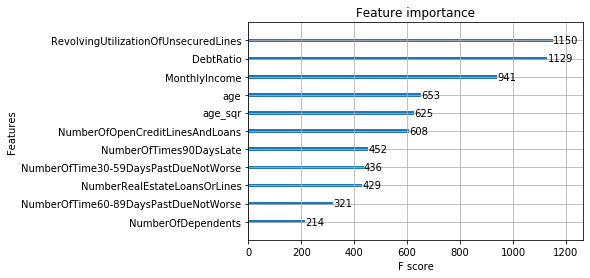

In [37]:
xgb.plot_importance(final_model)
plt.show()

In [39]:
SUB_1 = pd.DataFrame({'Id':test_df.ID.values,'Probability':ypred})
SUB_1.to_csv('Sub_XGB.csv',index=False)
SUB_1.head()

,Id,Probability
0,1,0.076550
1,2,0.237412
2,3,0.013946
3,4,0.343891
4,5,0.126603
